# Splitting the data into 20% Validation and 80% Training

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 837ms/step - accuracy: 0.1441 - loss: 2.4924 - val_accuracy: 0.2969 - val_loss: 2.2683
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 949ms/step - accuracy: 0.2108 - loss: 2.1509 - val_accuracy: 0.2812 - val_loss: 2.0850
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 919ms/step - accuracy: 0.4288 - loss: 1.7557 - val_accuracy: 0.4531 - val_loss: 1.6973
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 923ms/step - accuracy: 0.5204 - loss: 1.3618 - val_accuracy: 0.6250 - val_loss: 1.3141
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 998ms/step - accuracy: 0.6491 - loss: 1.0397 - val_accuracy: 0.6094 - val_loss: 1.1584
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 982ms/step - accuracy: 0.7568 - loss: 0.7919 - val_accuracy: 0.7188 - val_loss: 1.0028
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 957ms/step - accuracy: 0.8045 - loss: 0.5710 - val_accuracy: 0.7188 - val_loss: 0.7582
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7815 - loss: 0.6395 - val_accuracy: 0.7656 - val_loss: 0.6341
Epoch

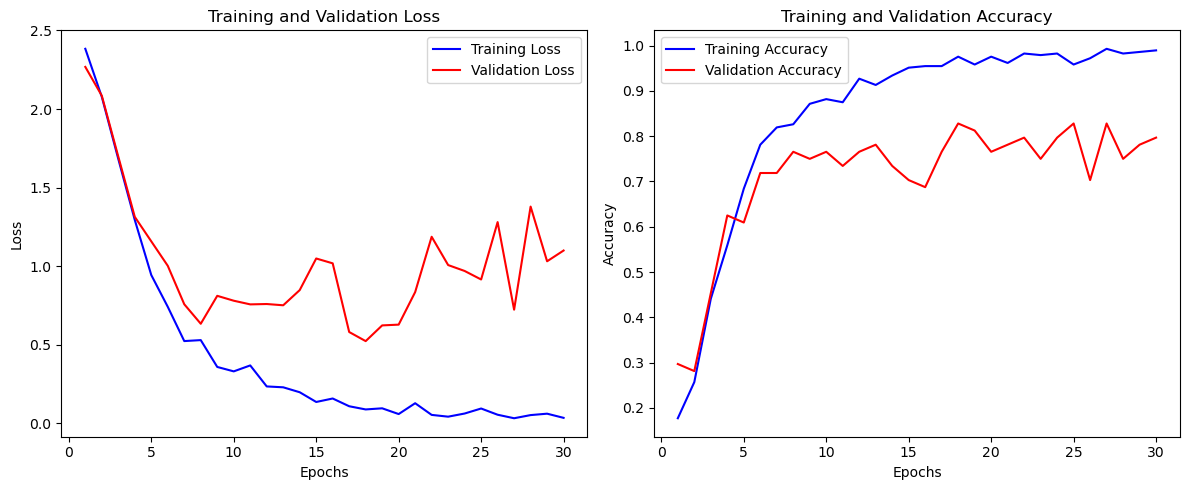

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step


Image 1: Predicted: 8, Actual: 8
Image 2: Predicted: 6, Actual: 6
Image 3: Predicted: 3, Actual: 3
Image 4: Predicted: 3, Actual: 3
Image 5: Predicted: 3, Actual: 3
Image 6: Predicted: 9, Actual: 9
Image 7: Predicted: 8, Actual: 8
Image 8: Predicted: 2, Actual: 2
Image 9: Predicted: 5, Actual: 5
Image 10: Predicted: 1, Actual: 1
Image 11: Predicted: 4, Actual: 0
Image 12: Predicted: 4, Actual: 4
Image 13: Predicted: 2, Actual: 2
Image 14: Predicted: 7, Actual: 1
Image 15: Predicted: 6, Actual: 6
Image 16: Predicted: 3, Actual: 3
Image 17: Predicted: 0, Actual: 4
Image 18: Predicted: 4, Actual: 2
Image 19: Predicted: 2, Actual: 2
Image 20: Predicted: 8, Actual: 8
Image 21: Predicted: 9, Actual: 9
Image 22: Predicted: 6, Actual: 6
Image 23: Predicted: 1, Actual: 1
Image 24: Predicted: 5, Actual: 5
Image 25: Predicted: 4, Actual: 4
Image 26: Predicted: 0, Actual: 0
Image 27: Predicted: 7, Actual: 7
Image 28: Predicted: 8, Actual: 8
Image 29: Predicted: 5, Actual: 5
Image 30: Predicted: 6,

In [33]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Step 1: Set paths
train_dir = "./Dataset/Train"
test_dir = "./Dataset/Test"

# Step 2: Parameters
img_width, img_height = 128, 128  # Resize dimensions
batch_size = 32
num_classes = 10  # Number of gesture classes

def load_and_process_train_images(directory):
    """
    Load and preprocess training images and labels from the given directory structure.
    Args:
        directory (str): Path to the training dataset directory.
    Returns:
        train_images (np.array): 4D NumPy array of shape (num_samples, img_width, img_height, 1).
        train_labels (np.array): 2D NumPy array of one-hot encoded class labels of shape (num_samples, num_classes).
    """
    images = []
    labels = []

    # Filter out non-numeric folders and sort in ascending order
    class_folders = sorted(
        [folder for folder in os.listdir(directory) if folder.isdigit()],
        key=int
    )

    # Iterate over class directories in ascending order
    for class_label in class_folders:
        class_dir = os.path.join(directory, class_label)
        if os.path.isdir(class_dir):
            #print(f"Processing class: {class_label}")  # Debug output
            for filename in os.listdir(class_dir):
                filepath = os.path.join(class_dir, filename)
                
                # Skip non-image files
                if not (filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg')):
                    continue
                
                # Read and preprocess the image
                image = cv2.imread(filepath)
                if image is None:
                    print(f"Failed to read image: {filepath}")
                    continue
                
                # Image preprocessing
                hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
                lower_blue = np.array([90, 50, 50], dtype=np.uint8)
                upper_blue = np.array([130, 255, 255], dtype=np.uint8)
                background_mask = cv2.inRange(hsv, lower_blue, upper_blue)
                hand_mask = cv2.bitwise_not(background_mask)
                grayscale_hand = cv2.cvtColor(cv2.bitwise_and(image, image, mask=hand_mask), cv2.COLOR_BGR2GRAY)
                _, binary_hand = cv2.threshold(grayscale_hand, 1, 255, cv2.THRESH_BINARY)

                # Resize and normalise
                binary_resized = cv2.resize(grayscale_hand, (img_width, img_height)) / 255.0

                # Append processed image and label
                images.append(np.expand_dims(binary_resized, axis=-1))  # Add channel dimension for grayscale
                labels.append(int(class_label))  # Use the folder name as the class label

    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    # One-hot encode the labels
    lb = LabelBinarizer()
    one_hot_labels = lb.fit_transform(labels)  # Convert labels to one-hot encoding

    return images, one_hot_labels
    
train_images, train_labels = load_and_process_train_images(train_dir)


# Split train data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

"""
print("Number of training samples:", len(train_images))
print("Number of validation samples:", len(val_images))
print("Training data shape:", train_images.shape)
print("Validation data shape:", val_images.shape)
"""

def load_and_process_test_images(directory):
    """
    Load and preprocess test images and labels from the given directory.
    The first digit of the image filename represents the class label.
    Args:
        directory (str): Path to the test dataset directory.
    Returns:
        test_images (np.array): 4D NumPy array of shape (num_samples, img_width, img_height, 1).
        test_labels (np.array): 2D NumPy array of one-hot encoded class labels of shape (num_samples, num_classes).
    """
    images = []
    labels = []

    # Iterate over all files in the test directory
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)

        # Skip non-image files
        if not (filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg')):
            continue

        # Read and preprocess the image
        image = cv2.imread(filepath)
        if image is None:
            print(f"Failed to read image: {filepath}")
            continue

        # Extract the class label from the first digit of the filename
        class_label = int(filename.split('_')[0])  # The first digit of the filename
        labels.append(class_label)

        # Image preprocessing
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        lower_blue = np.array([90, 50, 50], dtype=np.uint8)
        upper_blue = np.array([130, 255, 255], dtype=np.uint8)
        background_mask = cv2.inRange(hsv, lower_blue, upper_blue)
        hand_mask = cv2.bitwise_not(background_mask)
        grayscale_hand = cv2.cvtColor(cv2.bitwise_and(image, image, mask=hand_mask), cv2.COLOR_BGR2GRAY)
        _, binary_hand = cv2.threshold(grayscale_hand, 1, 255, cv2.THRESH_BINARY)

        # Resize and normalise
        binary_resized = cv2.resize(grayscale_hand, (img_width, img_height)) / 255.0


        # Append processed image
        images.append(np.expand_dims(binary_resized, axis=-1))  # Add channel dimension for grayscale

    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    # One-hot encode the labels
    lb = LabelBinarizer()
    one_hot_labels = lb.fit_transform(labels)  # Convert labels to one-hot encoding

    return images, one_hot_labels

# Load and process test images
test_dir = "./Dataset/Test"
test_images, test_labels = load_and_process_test_images(test_dir)

def dynamic_augment_images(images, labels, batch_size, augment=False):
    """
    Generate batches of training or validation images without any augmentations.
    Args:
        images (np.array): Image dataset.
        labels (np.array): Corresponding labels.
        batch_size (int): Batch size for data generation.
        augment (bool): Ignored as augmentations are removed.
    Yields:
        Batch of images and corresponding labels.
    """
    while True:
        indices = np.random.choice(len(images), batch_size, replace=False)  # Random batch sampling
        batch_images = []
        batch_labels = []
        for idx in indices:
            original_image = images[idx].squeeze()  # Remove channel dimension
            batch_images.append(np.expand_dims(original_image, axis=-1))  # Add channel dimension back
            batch_labels.append(labels[idx])
        
        yield np.array(batch_images), np.array(batch_labels)

# Define the CNN model
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),  # Prevent overfitting

    # Second Convolutional Block
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),  # Increased dropout to prevent overfitting

    # Third Convolutional Block
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),

    # Fully Connected Layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.6),  # Regularization for dense layer
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training generator without augmentations
batch_size = 32
train_generator = dynamic_augment_images(train_images, train_labels, batch_size, augment=False)

# Validation generator without augmentations
val_generator = dynamic_augment_images(val_images, val_labels, batch_size, augment=False)

# Reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_images) // batch_size,
    epochs=30,
    verbose=1,
    validation_data=val_generator,
    validation_steps=len(val_images) // batch_size
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=1)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


# Plot Loss and Accuracy Graphs
def plot_training_history(history):
    """
    Plots training and validation loss and accuracy.
    Args:
        history: Keras history object from model.fit()
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 5))
    
    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot training history
plot_training_history(history)

# Predictions and misclassifications
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Compare predictions with true labels
for i in range(len(test_images)):
    print(f"Image {i+1}: Predicted: {predicted_classes[i]}, Actual: {true_classes[i]}")

# Save the model
model.save('hand_gesture_cnn_with_augmentation.h5')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=1)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Predictions and misclassifications
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)  # Convert predictions to class indices
true_classes = np.argmax(test_labels, axis=1)  # Convert one-hot labels to class indices

# Calculate overall accuracy
overall_accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")

# Calculate the number of misclassified images
misclassified_indices = [i for i, (predicted, actual) in enumerate(zip(predicted_classes, true_classes)) if predicted != actual]
num_misclassified = len(misclassified_indices)
print(f"Number of misclassified images: {num_misclassified} out of {len(test_images)}")

# Print detailed classification report
report = classification_report(true_classes, predicted_classes, target_names=[f"Class {i}" for i in range(10)])
print("\nClassification Report:")
print(report)

# Print misclassified images for debugging
print("\nMisclassified Images:")
for i in misclassified_indices[:5]:  # Display first 5 misclassified images for brevity
    plt.imshow(test_images[i].squeeze(), cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}, Actual: {true_classes[i]}")
    plt.axis('off')
    plt.show()




# CNN without splitting of the data

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Step 1: Set paths
train_dir = "./Dataset/Train"
test_dir = "./Dataset/Test"

# Step 2: Parameters
img_width, img_height = 128, 128  # Resize dimensions
batch_size = 32
num_classes = 10  # Number of gesture classes

def load_and_process_train_images(directory):
    """
    Load and preprocess training images and labels from the given directory structure.
    Args:
        directory (str): Path to the training dataset directory.
    Returns:
        train_images (np.array): 4D NumPy array of shape (num_samples, img_width, img_height, 1).
        train_labels (np.array): 2D NumPy array of one-hot encoded class labels of shape (num_samples, num_classes).
    """
    images = []
    labels = []

    # Filter out non-numeric folders and sort in ascending order
    class_folders = sorted(
        [folder for folder in os.listdir(directory) if folder.isdigit()],
        key=int
    )

    # Iterate over class directories in ascending order
    for class_label in class_folders:
        class_dir = os.path.join(directory, class_label)
        if os.path.isdir(class_dir):
            print(f"Processing class: {class_label}")  # Debug output
            for filename in os.listdir(class_dir):
                filepath = os.path.join(class_dir, filename)
                
                # Skip non-image files
                if not (filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg')):
                    continue
                
                # Read and preprocess the image
                image = cv2.imread(filepath)
                if image is None:
                    print(f"Failed to read image: {filepath}")
                    continue
                
                # Image preprocessing
                hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
                lower_blue = np.array([90, 50, 50], dtype=np.uint8)
                upper_blue = np.array([130, 255, 255], dtype=np.uint8)
                background_mask = cv2.inRange(hsv, lower_blue, upper_blue)
                hand_mask = cv2.bitwise_not(background_mask)
                grayscale_hand = cv2.cvtColor(cv2.bitwise_and(image, image, mask=hand_mask), cv2.COLOR_BGR2GRAY)
                _, binary_hand = cv2.threshold(grayscale_hand, 1, 255, cv2.THRESH_BINARY)

                # Resize and normalise
                binary_resized = cv2.resize(grayscale_hand, (img_width, img_height)) / 255.0

                # Append processed image and label
                images.append(np.expand_dims(binary_resized, axis=-1))  # Add channel dimension for grayscale
                labels.append(int(class_label))  # Use the folder name as the class label

    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    # One-hot encode the labels
    lb = LabelBinarizer()
    one_hot_labels = lb.fit_transform(labels)  # Convert labels to one-hot encoding

    return images, one_hot_labels
    
train_images, train_labels = load_and_process_train_images(train_dir)

# Debugging Outputs
print(f"Train images shape: {train_images.shape}")  # Should be (num_samples, 128, 128, 1)
print(f"Train labels shape: {train_labels.shape}")  # Should be (num_samples, num_classes)

def load_and_process_test_images(directory):
    """
    Load and preprocess test images and labels from the given directory.
    The first digit of the image filename represents the class label.
    Args:
        directory (str): Path to the test dataset directory.
    Returns:
        test_images (np.array): 4D NumPy array of shape (num_samples, img_width, img_height, 1).
        test_labels (np.array): 2D NumPy array of one-hot encoded class labels of shape (num_samples, num_classes).
    """
    images = []
    labels = []

    # Iterate over all files in the test directory
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)

        # Skip non-image files
        if not (filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg')):
            continue

        # Read and preprocess the image
        image = cv2.imread(filepath)
        if image is None:
            print(f"Failed to read image: {filepath}")
            continue

        # Extract the class label from the first digit of the filename
        class_label = int(filename.split('_')[0])  # The first digit of the filename
        labels.append(class_label)

        # Image preprocessing
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        lower_blue = np.array([90, 50, 50], dtype=np.uint8)
        upper_blue = np.array([130, 255, 255], dtype=np.uint8)
        background_mask = cv2.inRange(hsv, lower_blue, upper_blue)
        hand_mask = cv2.bitwise_not(background_mask)
        grayscale_hand = cv2.cvtColor(cv2.bitwise_and(image, image, mask=hand_mask), cv2.COLOR_BGR2GRAY)
        _, binary_hand = cv2.threshold(grayscale_hand, 1, 255, cv2.THRESH_BINARY)

        # Resize and normalise
        binary_resized = cv2.resize(grayscale_hand, (img_width, img_height)) / 255.0


        # Append processed image
        images.append(np.expand_dims(binary_resized, axis=-1))  # Add channel dimension for grayscale

    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    # One-hot encode the labels
    lb = LabelBinarizer()
    one_hot_labels = lb.fit_transform(labels)  # Convert labels to one-hot encoding

    return images, one_hot_labels

# Load and process test images
test_dir = "./Dataset/Test"
test_images, test_labels = load_and_process_test_images(test_dir)

def augment_image(image):
    """
    Apply random augmentations to the input image.
    """
    augmented_images = []
    img_width, img_height = image.shape[1], image.shape[0]
    
    # Rotation
    angle = np.random.choice([-15, 15])  # Randomly rotate by ±15 degrees
    M = cv2.getRotationMatrix2D((img_width // 2, img_height // 2), angle, 1)
    rotated = cv2.warpAffine(image, M, (img_width, img_height))
    augmented_images.append(rotated)
    
    # Horizontal flip
    flipped = cv2.flip(image, 1)
    augmented_images.append(flipped)
    
    # Scaling (zoom in/out)
    scale = np.random.uniform(0.9, 1.1)  # Scale by 90% to 110%
    resized = cv2.resize(image, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
    resized = cv2.resize(resized, (img_width, img_height))  # Resize back to original dimensions
    augmented_images.append(resized)
    
    # Random brightness adjustment
    brightness_factor = np.random.uniform(0.8, 1.2)
    brightened = np.clip(image * brightness_factor, 0, 255).astype(np.uint8)
    augmented_images.append(brightened)
    
    # Add Gaussian noise
    mean = 0
    std = np.random.uniform(5, 15)  # Adjust the standard deviation for noise
    gaussian_noise = np.random.normal(mean, std, image.shape).astype(np.float32)
    noisy_image = np.clip(image + gaussian_noise, 0, 255).astype(np.uint8)
    augmented_images.append(noisy_image)
    
    return np.array(augmented_images)


def dynamic_augment_train_images(train_images, train_labels, batch_size):
    """
    Generate augmented training images dynamically during training.
    """
    while True:
        indices = np.random.choice(len(train_images), batch_size)
        batch_images = []
        batch_labels = []
        for idx in indices:
            original_image = train_images[idx].squeeze()  # Remove channel dimension
            aug_images = augment_image(original_image)  # Apply augmentations
            
            # Pick one augmented image randomly for this batch
            augmented_image = aug_images[np.random.randint(len(aug_images))]
            batch_images.append(np.expand_dims(augmented_image, axis=-1))  # Add channel dimension back
            batch_labels.append(train_labels[idx])
        
        yield np.array(batch_images), np.array(batch_labels)


        
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),  # Prevent overfitting

    # Second Convolutional Block
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),  # Increased dropout to prevent overfitting

    # Third Convolutional Block
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    # Fully Connected Layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Regularization for dense layer
    Dense(10, activation='softmax')  # Output layer with 10 classes
])


model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

# Train the model with dynamic augmentation
batch_size = 32
train_generator = dynamic_augment_train_images(train_images, train_labels, batch_size)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1
)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_images) // batch_size,
    epochs=50,
    verbose=1,
    validation_data=(val_images, val_labels)  # Use the validation set here
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=1)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Predictions and misclassifications
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Compare predictions with true labels
for i in range(len(test_images)):
    print(f"Image {i+1}: Predicted: {predicted_classes[i]}, Actual: {true_classes[i]}")

# Save the model
model.save('hand_gesture_cnn_with_augmentation.h5')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=1)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Predictions and misclassifications
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)  # Convert predictions to class indices
true_classes = np.argmax(test_labels, axis=1)  # Convert one-hot labels to class indices

# Calculate overall accuracy
overall_accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")

# Calculate the number of misclassified images
misclassified_indices = [i for i, (predicted, actual) in enumerate(zip(predicted_classes, true_classes)) if predicted != actual]
num_misclassified = len(misclassified_indices)
print(f"Number of misclassified images: {num_misclassified} out of {len(test_images)}")

# Print detailed classification report
report = classification_report(true_classes, predicted_classes, target_names=[f"Class {i}" for i in range(10)])
print("\nClassification Report:")
print(report)

# Print misclassified images for debugging
print("\nMisclassified Images:")
for i in misclassified_indices[:5]:  # Display first 5 misclassified images for brevity
    plt.imshow(test_images[i].squeeze(), cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}, Actual: {true_classes[i]}")
    plt.axis('off')
    plt.show()

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(10)], yticklabels=[f'Class {i}' for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
